## Problem Statement

You can download train and test dataset from [here](https://drive.google.com/drive/folders/1F2PjpJ_u_iaD-Fs0wwcymRiVVLK34-Fu). This dataset has 4 classes. Labels for
training data are provided, you have to submit labels of test data. Feel free to use any Machine
learning or Deep learning technique.

### Imports

In this notebook,

In [206]:
import os
import pickle
from collections import Counter

#data ana
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#scikit-learn utilities
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, accuracy_score, 
                             confusion_matrix)  

#deep learning library
import keras
from keras.models import Sequential
from keras.layers import (Conv2D, MaxPooling2D, 
                          Dense, Flatten, 
                          Dropout, BatchNormalization)
from keras.optimizers import Adam, RMSprop
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

% matplotlib inline

In [2]:
#Path for all the data files
PATH = r'C:\Users\Akshay\Desktop'

### Data Loading and Visualization

In [3]:
with open(f'{PATH}\\train_image.pkl', 'rb') as image_file:
    train_images = pickle.load(image_file)

In [4]:
print(f"Number of training samples: {len(train_images)}")

Number of training samples: 8000


In [5]:
train_labels = np.array(np.load(f'{PATH}\\train_label.pkl', allow_pickle=True))

In [6]:
Counter(train_labels)

Counter({0: 2000, 2: 2000, 3: 2000, 6: 2000})

So, we have 2000 training samples corresponding to each of the 4 classes: 0, 2, 3 and 6, hence, in total we have 8000 number of images for training. As all the classes are equally distributed, our dataset is perfectly balanced and doesn't need any kind of oversampling or undersampling.<br>
Now, lets have look at some of the images from our training data. Before, plotting we will first convert the list: `train_images` to a `numpy` array.

In [7]:
train_images = np.array(train_images)

In [8]:
print(f"Shape of train_images: {train_images.shape}")

Shape of train_images: (8000, 784)


Here, 8000 is the number of training samples. We can conclude from shape of the `train_images` that each image has been represented by a vector of length 784. So, its very much likely that each of the images were initially of size: 28 X 28 pixels and have been flattened to 28*28 i.e. 784 length of vector. Let's see if our inference is correct by plotting the samples by reshaping them to a size of 28 X 28.

In [9]:
def plot_multiple_data(n_rows, n_columns, indices):
    fig = plt.figure(figsize=(n_rows*2, n_columns*2))

    for i in range(1, n_rows*n_columns + 1):
        plt.subplot(n_rows, n_columns, i)
        plt.imshow(train_images[indices[i]].reshape(28, 28))
        plt.title(f'Label: {train_labels[indices[i]]}') #corresponding label to each of the image
    fig.tight_layout()  #for better padding amongst subplots
    plt.show()

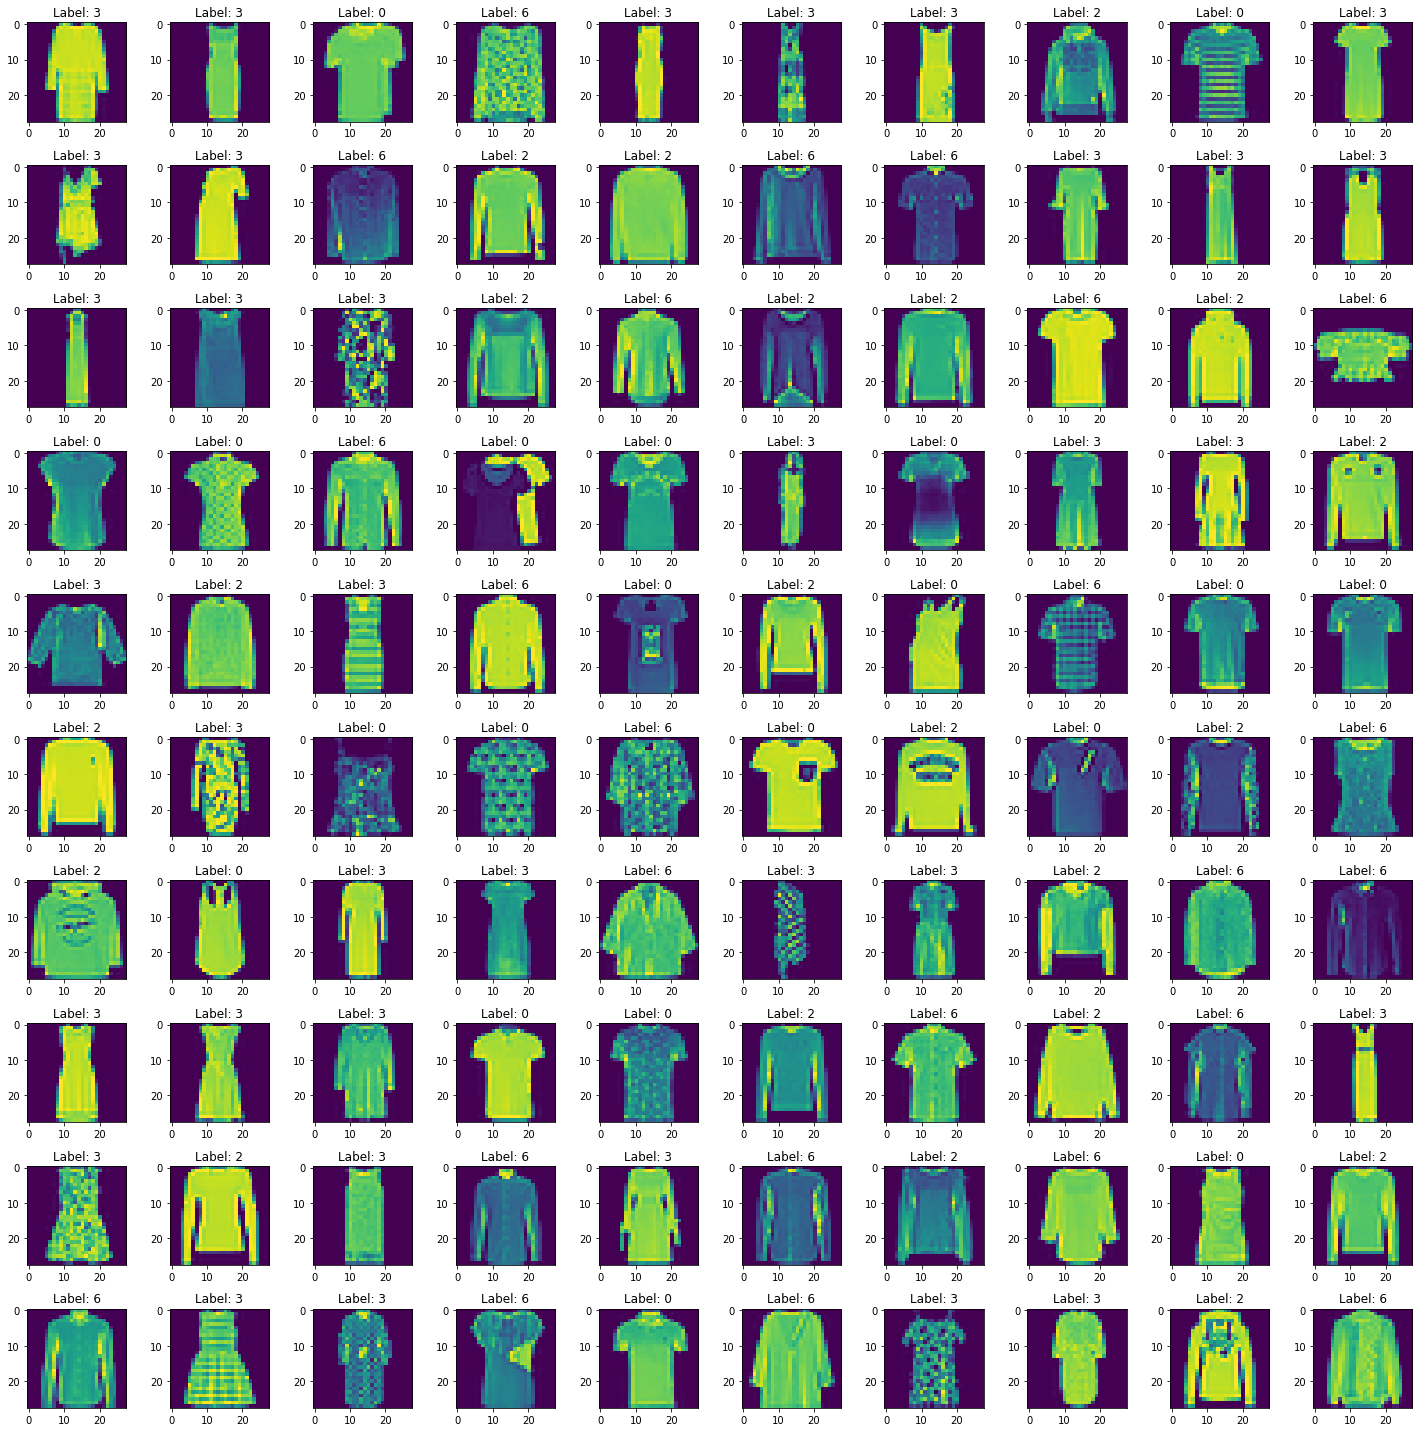

In [10]:
random_indices = np.random.permutation(train_images.shape[0]) #generate random indices for plotting
plot_multiple_data(10, 10, random_indices)

After seeing the above subplots, we can say that:
* Label 0 is for Half sleeve T-shirts/Tops
* Label 2 is for Long sleeve T-shirts or Pullovers
* Label 3 is for Dress
* Label 6 is for Shirts

### Data Pre-processing

In [11]:
#setting random seed so that every time we run random, we get the same result
np.random.seed(42)

#### Splitting the available training data into train and validation sets

In [157]:
Train_x, Val_x, Train_y, Val_y = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

In [13]:
print(f"Shape of Training features: {Train_x.shape}")
print(f"Shape of Training labels: {Train_y.shape}")
print(f"Shape of Validation features: {Val_x.shape}")
print(f"Shape of Validation labels: {Val_y.shape}")  

Shape of Training features: (7200, 784)
Shape of Training labels: (7200,)
Shape of Validation features: (800, 784)
Shape of Validation labels: (800,)


#### Pre-processing for CNN classifier

##### Reshaping the Train_x and Val_x 

In [14]:
def reshape_vector(Train_x, Val_x):
    return Train_x.reshape((-1, 28, 28, 1)), Val_x.reshape((-1, 28, 28, 1))

##### Normalizing by scaling down pixel values to the range [0, 1]

In [15]:
def normalize(Train_x, Val_x): 
    return Train_x.astype("float32") / 255.0, Val_x.astype("float32") / 255.0

##### One-hot encoding Labels

In [16]:
def one_hot_encode(Train_y, Val_y):
    return pd.get_dummies(Train_y), pd.get_dummies(Val_y)

### Classification

#### 1. Using K-Nearest Neighbors Classifier

In [17]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(Train_x, Train_y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [18]:
neigh_predictions = neigh.predict(Val_x)

In [19]:
neigh_accuracy = accuracy_score(Val_y, neigh_predictions)
print(f'Accuracy score of KNN Classifier: {neigh_accuracy}')

Accuracy score of KNN Classifier: 0.78


In [56]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot = True, ax = ax, fmt = 'g'); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels[::-1])

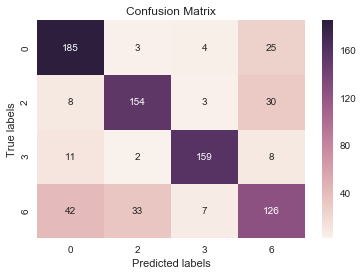

In [57]:
labels = [0, 2, 3, 6]
plot_confusion_matrix(Val_y, neigh_predictions, labels)

In [20]:
neigh_classification_report = classification_report(Val_y, neigh_predictions)
print(f'Classification report of KNN Classifier: \n{neigh_classification_report}')

Classification report of KNN Classifier: 
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       217
           2       0.80      0.79      0.80       195
           3       0.92      0.88      0.90       180
           6       0.67      0.61      0.63       208

   micro avg       0.78      0.78      0.78       800
   macro avg       0.78      0.78      0.78       800
weighted avg       0.78      0.78      0.78       800



In [49]:
labels

[6, 3, 2, 0]

#### 2. Using Decision Tree Classifier

In [59]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, splitter = 'best')
tree.fit(Train_x, Train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
tree_predictions = tree.predict(Val_x)

In [61]:
tree_accuracy = accuracy_score(Val_y, tree_predictions)
print(f'Accuracy score of Decision Tree Classifier: {tree_accuracy}')

Accuracy score of Decision Tree Classifier: 0.7625


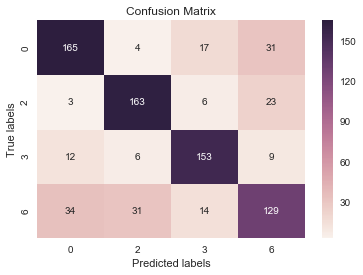

In [62]:
labels = [0, 2, 3, 6]
plot_confusion_matrix(Val_y, tree_predictions, labels)

In [63]:
tree_classification_report = classification_report(Val_y, tree_predictions)
print(f'Classification report of Decision Tree Classifier: \n{tree_classification_report}')

Classification report of Decision Tree Classifier: 
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       217
           2       0.80      0.84      0.82       195
           3       0.81      0.85      0.83       180
           6       0.67      0.62      0.65       208

   micro avg       0.76      0.76      0.76       800
   macro avg       0.76      0.77      0.76       800
weighted avg       0.76      0.76      0.76       800



#### 3. Using Random Forest Classifier

In [64]:
forest = RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=100)
forest.fit(Train_x, Train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
forest_predictions = forest.predict(Val_x)

In [66]:
forest_accuracy = accuracy_score(Val_y, forest_predictions)
print(f'Accuracy score of Random Forest Classifier: {forest_accuracy}')

Accuracy score of Random Forest Classifier: 0.8175


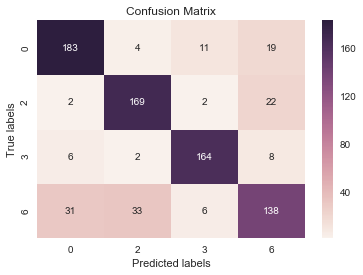

In [67]:
labels = [0, 2, 3, 6]
plot_confusion_matrix(Val_y, forest_predictions, labels)

In [68]:
forest_classification_report = classification_report(Val_y, forest_predictions)
print(f'Classification report of Random Forest Classifier: \n{forest_classification_report}')

Classification report of Random Forest Classifier: 
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       217
           2       0.81      0.87      0.84       195
           3       0.90      0.91      0.90       180
           6       0.74      0.66      0.70       208

   micro avg       0.82      0.82      0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800



#### 4. Using Support Vector Classifier

In [69]:
svc = SVC(C=10, kernel='poly', gamma='auto')
svc.fit(Train_x, Train_y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
svc_predictions = svc.predict(Val_x)

In [71]:
svc_accuracy = accuracy_score(Val_y, svc_predictions)
print(f'Accuracy score of Support Vector Classifier: {svc_accuracy}')

Accuracy score of Support Vector Classifier: 0.805


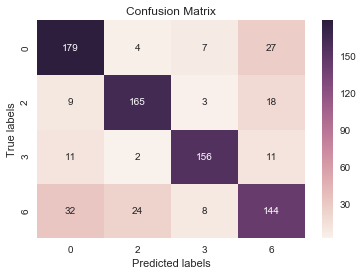

In [72]:
labels = [0, 2, 3, 6]
plot_confusion_matrix(Val_y, svc_predictions, labels)

In [73]:
svc_classification_report = classification_report(Val_y, svc_predictions)
print(f'Classification report of Support Vector Classifier: \n{svc_classification_report}')

Classification report of Support Vector Classifier: 
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       217
           2       0.85      0.85      0.85       195
           3       0.90      0.87      0.88       180
           6       0.72      0.69      0.71       208

   micro avg       0.81      0.81      0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.80       800



#### 5. Using Convolutional Neural Networks

In [158]:
Train_x, Val_x = reshape_vector(Train_x, Val_x)
Train_x, Val_x = normalize(Train_x, Val_x)
Train_y, Val_y = one_hot_encode(Train_y, Val_y)

##### Model 1

In [80]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (28,28,1), activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Dropout(0.50))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Dropout(0.50))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 32, activation = "relu"))
model.add(Dense(units = 4, activation = "softmax"))

In [81]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)          0         
__________

In [82]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(lr=0.001), metrics =['accuracy'])

In [83]:
epochs = 25
batch_size=64
history = model.fit(Train_x, Train_y,
                     batch_size = batch_size,
                     epochs = epochs,
                     verbose = 2,
                     validation_data = (Val_x, Val_y))

Train on 7200 samples, validate on 800 samples
Epoch 1/25
 - 27s - loss: 1.0225 - acc: 0.5138 - val_loss: 0.8410 - val_acc: 0.6325
Epoch 2/25
 - 25s - loss: 0.7782 - acc: 0.6558 - val_loss: 0.6936 - val_acc: 0.7000
Epoch 3/25
 - 24s - loss: 0.6804 - acc: 0.7008 - val_loss: 0.6132 - val_acc: 0.7462
Epoch 4/25
 - 26s - loss: 0.6215 - acc: 0.7399 - val_loss: 0.5858 - val_acc: 0.7712
Epoch 5/25
 - 25s - loss: 0.5801 - acc: 0.7626 - val_loss: 0.5523 - val_acc: 0.7700
Epoch 6/25
 - 26s - loss: 0.5502 - acc: 0.7756 - val_loss: 0.5463 - val_acc: 0.7688
Epoch 7/25
 - 25s - loss: 0.5176 - acc: 0.7937 - val_loss: 0.5139 - val_acc: 0.7850
Epoch 8/25
 - 27s - loss: 0.5059 - acc: 0.7965 - val_loss: 0.5421 - val_acc: 0.7788
Epoch 9/25
 - 26s - loss: 0.4930 - acc: 0.8032 - val_loss: 0.4872 - val_acc: 0.8000
Epoch 10/25
 - 24s - loss: 0.4718 - acc: 0.8151 - val_loss: 0.4689 - val_acc: 0.7987
Epoch 11/25
 - 25s - loss: 0.4645 - acc: 0.8146 - val_loss: 0.4668 - val_acc: 0.8163
Epoch 12/25
 - 24s - loss: 

In [94]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

In [118]:
def plot_loss_acc(history, n_epochs):
    
    history_record = []
    history_record.append(history.history['loss'])
    history_record.append(history.history['acc'])
    history_record.append(history.history['val_loss'])
    history_record.append(history.history['val_acc'])
    
    fig = plt.figure(figsize=(8, 4))
    
    for i in range(1, 3):
        plt.subplot(1, 2, i)
        plt.plot(np.arange(n_epochs), history_record[i - 1], label = "Training")
        plt.plot(np.arange(n_epochs), history_record[i + 1], label = "Validation")
        plt.xlabel('Epochs')
        if(i % 2 != 0):
            plt.ylabel('Loss function values')
        else:
            plt.ylabel('Accuracy values')
        plt.legend()
        
    fig.tight_layout()
    plt.show()
    

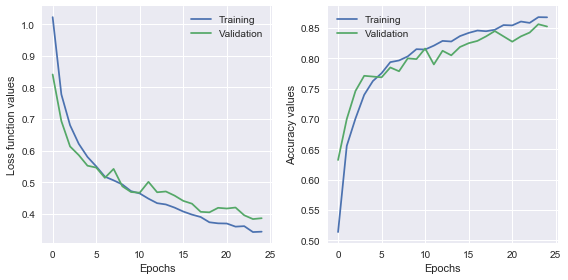

In [119]:
plot_loss_acc(history, 25)

In [131]:
predictions = model.predict(Val_x)

In [132]:
model.predict(Val_x[0].reshape(1, 28, 28, 1))

array([[6.5609009e-04, 8.4759516e-01, 4.0542818e-05, 1.5170820e-01]],
      dtype=float32)

In [155]:
prediction_dict = {0: 0, 1: 2, 2: 3, 3: 6}
CNN_predictions = np.zeros(len(predictions))
for i in range(len(predictions)):
    arg_max = np.argmax(predictions[i])
    CNN_predictions[i] = prediction_dict[arg_max]

In [159]:
Orig_Val_y = Val_y.values.argmax(axis=1)
Orig_Val_y = np.array([prediction_dict[y] for y in Orig_Val_y])

In [164]:
Orig_Val_y[:5]

array([2, 2, 0, 2, 3])

In [165]:
CNN_predictions[:5]

array([2., 2., 0., 2., 3.])

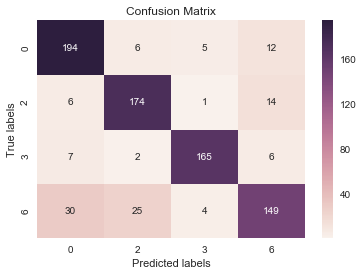

In [160]:
labels = [0, 2, 3, 6]
plot_confusion_matrix(Orig_Val_y, CNN_predictions, labels)

In [121]:
model.save(f'{PATH}//model-1.h5')

In [177]:
del model

##### Model 2

In [227]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5, 5), input_shape = (28,28,1), padding = "same", activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = "same", activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Dropout(0.50))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Dropout(0.50))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 64, activation = "relu"))
model.add(Dense(units = 4, activation = "softmax"))

In [228]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 7, 7, 64)          0         
__________

In [229]:
model.compile(loss = 'categorical_crossentropy', optimizer= Adam(lr=0.001), metrics =['accuracy'])

In [230]:
epochs = 40
batch_size=64

aug = ImageDataGenerator(rotation_range=20, zoom_range=(0.9, 1.1),
width_shift_range=0.1, height_shift_range=0.1, shear_range=0.5,
horizontal_flip=True, fill_mode="nearest")
 
history = model.fit_generator(aug.flow(Train_x, Train_y, batch_size = batch_size),
validation_data=(Val_x, Val_y), epochs = epochs)

Epoch 1/40
113/113 [==============================] - 74s 651ms/step - loss: 1.1390 - acc: 0.4657 - val_loss: 0.8487 - val_acc: 0.6338
Epoch 2/40
113/113 [==============================] - 72s 639ms/step - loss: 0.8365 - acc: 0.6380 - val_loss: 0.6960 - val_acc: 0.6763
Epoch 3/40
113/113 [==============================] - 73s 644ms/step - loss: 0.7550 - acc: 0.6784 - val_loss: 0.6485 - val_acc: 0.7063
Epoch 4/40
113/113 [==============================] - 75s 660ms/step - loss: 0.7259 - acc: 0.6919 - val_loss: 0.6373 - val_acc: 0.7150
Epoch 5/40
113/113 [==============================] - 72s 640ms/step - loss: 0.6868 - acc: 0.7132 - val_loss: 0.6597 - val_acc: 0.6975
Epoch 6/40
113/113 [==============================] - 76s 669ms/step - loss: 0.6769 - acc: 0.7172 - val_loss: 0.6188 - val_acc: 0.7300
Epoch 7/40
113/113 [==============================] - 73s 646ms/step - loss: 0.6621 - acc: 0.7176 - val_loss: 0.6263 - val_acc: 0.7125
Epoch 8/40
113/113 [==============================] - 7

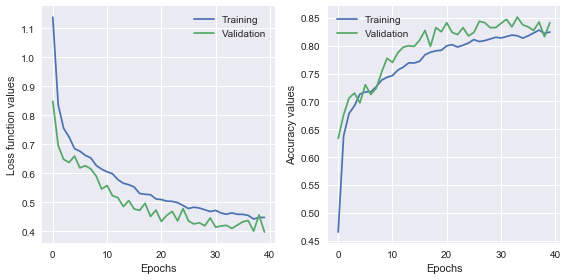

In [231]:
plot_loss_acc(history, 40)

In [232]:
predictions = model.predict(Val_x)

In [233]:
prediction_dict = {0: 0, 1: 2, 2: 3, 3: 6}
CNN_predictions = np.zeros(len(predictions))
for i in range(len(predictions)):
    arg_max = np.argmax(predictions[i])
    CNN_predictions[i] = prediction_dict[arg_max]

In [234]:
Orig_Val_y = Val_y.values.argmax(axis=1)
Orig_Val_y = np.array([prediction_dict[y] for y in Orig_Val_y])

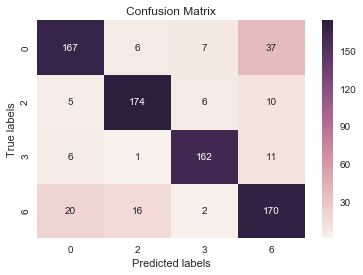

In [237]:
labels = [0, 2, 3, 6]
plot_confusion_matrix(Orig_Val_y, CNN_predictions, labels)

In [238]:
model.save(f'{PATH}//model-2')